### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is whether the words condition is congruent or incongruent. And the dependent variable is how long it takes participants to define the color of the words.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

For this experiment, the null hypothesis will be that the recorded time for Congruent words is the same as the recorded time for Incongruent words, and the alternative hypothesis will be that the recorded time for Congruent words is different from the recorded time for Incongruent words.

P(con): Congruent population mean.

P(incon): Incongruent population mean.

The Null Hypothesis: 

        $P(incon) - P(con) = 0$

The Alternative Hypothesis: 

        $P(incon) - P(con) != 0$

The reason we chose a two-tailed test is that we want to prove if the incongruent words takes different times to identify words condition than congruent words.

So with that hypothesis we test and see if there is a statistical significance, and if so, we reject the null which will prove our theory that the incongruent words take different times than the congruent.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Perform the analysis here
#the round function is used to round the numbers to 4 decimal points
#use Series mean method to measure the mean for Congruent and Incongruent columns
print('The mean time for Congruent words is: ', round(df['Congruent'].mean(), 4))
print('The mean time for Incongruent words is: ', round(df['Incongruent'].mean(), 4))
#use Series quantile method to measure the quantile at the specified range
#to calculate the interquantile range we subtract the 75% quantile from the 25% quantile
#con_iqr holds the interquartile range for the Congruent column
#incon_iqr holds the interquartile range for the Incongruent column
con_iqr = df['Congruent'].quantile(.75) - df['Congruent'].quantile(.25)
print('The interquartile range for Congruent words is ', round(con_iqr, 4))
incon_iqr = df['Incongruent'].quantile(.75) - df['Incongruent'].quantile(.25)
print('The interquartile range for Incongruent words is ', round(incon_iqr, 4))

The mean time for Congruent words is:  14.0511
The mean time for Incongruent words is:  22.0159
The interquartile range for Congruent words is  4.3055
The interquartile range for Incongruent words is  5.3347


Measure of central tendency: The mean of both Congruent and Incongruent.

        The mean time for Congruent words is:  14.0511

        The mean time for Incongruent words is:  22.0159

Measure of variability: The Interquartile range of both Congruent and Incongruent.

        The interquartile range for Congruent words is  4.3055

        The interquartile range for Incongruent words is  5.3347

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [3]:
# here we perform bootstrap sampling
# and collect our statistic from the data samples
# and store it in diffs_mean
diffs_mean = []
df_sample = df.sample(df.shape[0])
for _ in range(10000):
    boot_sample = df_sample.sample(df.shape[0], replace=True)
    diffs_mean.append(boot_sample['Incongruent'].mean() - boot_sample['Congruent'].mean())
    
diffs_mean = np.asarray(diffs_mean)

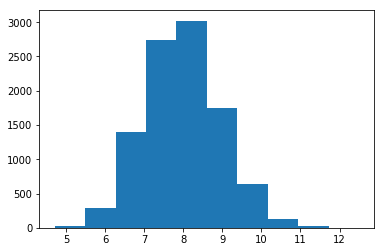

In [4]:
# Build the visualizations here
plt.hist(diffs_mean);

From the plot we observe that on average the time it takes to identify incongruent words is more than it takes for congruent words.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

For a small sample size it is encouraged to use a t-test rather than a z-test and since our sample size is only 24 we are going to implement a t-test. And because all individuals in our dataset are performing both tests it's going to be a dependent t-test for paired samples.

We can assume the distribution of the differences of means between the two variables to be approximately normal, our plot above supports that assumption.

In [5]:
#This is a two-tailed test for the null hypothesis that 2 dependent samples have identical (expected) average values
# we use the ttest_rel from scipy.stats to calculate the t-statistic and p-value
from scipy import stats
tstat, pvalue = stats.ttest_rel(df['Incongruent'], df['Congruent'])

In [6]:
tstat, pvalue

(8.020706944109957, 4.1030005857111781e-08)

In [7]:
#extra insurance that our statistical test was accurate
#implement the following formula to calculate the t-statistic
#t-stat = (mean(a) - mean(b)) / (standard_deviation(a - b)/square_root(N))
import math
tstat = (df['Incongruent'].mean() - df['Congruent'].mean())/(np.std(df['Incongruent'] - df['Congruent'])/math.sqrt(df.shape[0]))
tstat

8.1932150009707758

For this hypothesis we are going to compare the p-value against a 5% type I error threshold. Seeing that the p-value is lower than 5%, we conclude that there is a statistical significance, which means we have reason to reject the null hypothesis. 

In this experiment we were trying to prove that it takes different times to identify different word conditions, which was what we expected and proven. By rejecting the null hypothesis we have proof that it does take different times to identify Congruent and Incongruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--